In [165]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore #for outlier
from scipy import stats # for plot normal distribution

In [166]:
# Load data

bronx_data = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_bronx.xlsx",skiprows=6)
bronx2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_bronx.xlsx",skiprows=6,thousands=',')
brooklyn2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_brooklyn.xlsx",skiprows=6,thousands=',')
manhattan2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_manhattan.xlsx",skiprows=6,thousands=',')
queens2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_queens.xlsx",skiprows=6,thousands=',')
statenisland2020 = pd.read_excel(r"NYC_Housing_Dataset_2020/2020_staten_island.xlsx",skiprows=6,thousands=',')

# Load data for NYC price prediction 2021
bronx2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_bronx.xlsx",skiprows=6)
brooklyn2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_brooklyn.xlsx",skiprows=6)
manhattan2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_manhattan.xlsx",skiprows=6)
queens2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_queens.xlsx",skiprows=6)
statensisland2021 = pd.read_excel("NYC_Housing_Dataset_2021/2021_staten_island.xlsx",skiprows=6)

In [167]:
NYC = pd.concat([manhattan2020, manhattan2021,bronx2020, bronx2021,brooklyn2020,brooklyn2021, 
                 queens2020,queens2021,statenisland2020,statensisland2021], ignore_index=True)
NYC.columns = [c.replace('\n', '') for c in NYC.columns]
NYC.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIALUNITS,COMMERCIALUNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASSAT TIME OF SALE,SALE PRICE,SALE DATE
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1.0,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,377.0,72.0,NaN,B9,231 EAST 7TH,NaN,...,2.0,0.0,2.0,1718.0,5154.0,1901.0,1.0,B9,0.0,2020-10-02
2,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,2381.0,3084.0,1899.0,1.0,C0,0.0,2020-10-31
3,1.0,ALPHABET CITY,03 THREE FAMILY DWELLINGS,1,377.0,66.0,NaN,C0,243 EAST 7TH STREET,NaN,...,3.0,0.0,3.0,2381.0,3084.0,1899.0,1.0,C0,4350000.0,2020-07-16
4,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,372.0,10.0,NaN,C7,274 EAST 3RD,NaN,...,9.0,1.0,10.0,2021.0,6445.0,1900.0,2.0,C7,0.0,2020-12-27
5,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,374.0,1.0,NaN,C7,301-303 EAST 4TH STREET,NaN,...,8.0,2.0,10.0,1501.0,6929.0,1900.0,2.0,C7,3672530.0,2020-11-24
6,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,28.0,NaN,C4,272 EAST 7TH STREET,NaN,...,24.0,0.0,24.0,2764.0,13206.0,1900.0,2.0,C4,1.0,2020-06-26
7,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1A",NaN,...,19.0,0.0,19.0,2772.0,13248.0,1920.0,2.0,C4,2500.0,2020-02-11
8,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1B/2B",NaN,...,19.0,0.0,19.0,2772.0,13248.0,1920.0,2.0,C4,290000.0,2020-02-07
9,1.0,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,376.0,31.0,NaN,C4,"278 EAST 7TH STREET, 1C/1D",NaN,...,19.0,0.0,19.0,2772.0,13248.0,1920.0,2.0,C4,2500.0,2020-02-11


In [168]:
print(bronx2020)

      BOROUGH NEIGHBORHOOD         BUILDING CLASS CATEGORY  \
0         NaN          NaN                             NaN   
1         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
2         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
3         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
4         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
...       ...          ...                             ...   
6641      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6642      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6643      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6644      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6645      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   

     TAX CLASS AT PRESENT   BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
0                     NaN     NaN   NaN        NaN                       NaN   
1                       1  3029.0  36.0        NaN                        A5   
2              

In [169]:
print(bronx_data)

      BOROUGH NEIGHBORHOOD         BUILDING CLASS CATEGORY  \
0         NaN          NaN                             NaN   
1         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
2         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
3         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
4         2.0     BATHGATE         01 ONE FAMILY DWELLINGS   
...       ...          ...                             ...   
6641      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6642      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6643      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6644      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   
6645      2.0     WOODLAWN  10 COOPS - ELEVATOR APARTMENTS   

     TAX CLASS AT PRESENT   BLOCK   LOT  EASE-MENT BUILDING CLASS AT PRESENT  \
0                     NaN     NaN   NaN        NaN                       NaN   
1                       1  3029.0  36.0        NaN                        A5   
2              

### 2. Data Cleaning and Data Preprocessing 

#### a. Duplicates

In [171]:
#Delete the duplicates and check that it worked
NYC = NYC.drop_duplicates(NYC.columns, keep='last')
sum(NYC.duplicated(NYC.columns))

0

#### b. Uniqueness

In [172]:
## Uniqueness

In [173]:
#Check for the number of unique values for every column 
for i in NYC.columns:
  print(str(i) + ":" + str(NYC[i].nunique()))

BOROUGH:5
NEIGHBORHOOD:255
BUILDING CLASS CATEGORY:44
TAX CLASS AT PRESENT:10
BLOCK:12764
LOT:3505
EASE-MENT:0
BUILDING CLASS AT PRESENT:167
ADDRESS:159351
APARTMENT NUMBER:6670
ZIP CODE:195
RESIDENTIALUNITS:188
COMMERCIALUNITS:71
TOTAL UNITS:199
LAND SQUARE FEET:8177
GROSS SQUARE FEET:7520
YEAR BUILT:183
TAX CLASS AT TIME OF SALE:3
BUILDING CLASSAT TIME OF SALE:167
SALE PRICE:13678
SALE DATE:731


#### c. Data type transformation 

Since there is no information in EASE-MENT columns, we will drop it initially. We will also drop the SALE DATE column as we are not considering the effect of time on the sale price. 

In [175]:
#Converting columns to respective datatype
categoricalData = ['BOROUGH','TAX CLASS AT PRESENT','BUILDING CLASS CATEGORY',
                    'TAX CLASS AT TIME OF SALE',
                    'BUILDING CLASS AT PRESENT',
                    'BUILDING CLASSAT TIME OF SALE']
for each in categoricalData:
    NYC[each] = NYC[each].astype('category')
NYC['LAND SQUARE FEET'] = pd.to_numeric(NYC['LAND SQUARE FEET'], errors='coerce')
NYC['GROSS SQUARE FEET']= pd.to_numeric(NYC['GROSS SQUARE FEET'], errors='coerce')
NYC['SALE PRICE'] = NYC['SALE PRICE'].replace('[CA\$,]', '', regex=True).astype(float) * 0.77 # convert to US dollars 
NYC = NYC.drop(columns=["SALE DATE", "EASE-MENT"])
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167775 entries, 1 to 167783
Data columns (total 19 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   BOROUGH                        167774 non-null  category
 1   NEIGHBORHOOD                   167774 non-null  object  
 2   BUILDING CLASS CATEGORY        167774 non-null  category
 3   TAX CLASS AT PRESENT           167563 non-null  category
 4   BLOCK                          167774 non-null  float64 
 5   LOT                            167774 non-null  float64 
 6   BUILDING CLASS AT PRESENT      167563 non-null  category
 7   ADDRESS                        167774 non-null  object  
 8   APARTMENT NUMBER               40035 non-null   object  
 9   ZIP CODE                       167762 non-null  float64 
 10  RESIDENTIALUNITS               131344 non-null  float64 
 11  COMMERCIALUNITS                112230 non-null  float64 
 12  TOTAL UNITS     

#### d. Missing values

In [177]:
# Drop LAND SQUARE FEET = 0, GROSS SQUARE FEET = 0, YEAR BUILT = 0   
NYC = NYC[NYC['LAND SQUARE FEET'] > 0]
NYC = NYC[NYC['GROSS SQUARE FEET'] > 0]
NYC = NYC[NYC['YEAR BUILT'] > 0]  
#Drop the missing values
NYC.dropna(how='all',axis=1,inplace=True)
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90241 entries, 1 to 167780
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   BOROUGH                        90241 non-null  category
 1   NEIGHBORHOOD                   90241 non-null  object  
 2   BUILDING CLASS CATEGORY        90241 non-null  category
 3   TAX CLASS AT PRESENT           90241 non-null  category
 4   BLOCK                          90241 non-null  float64 
 5   LOT                            90241 non-null  float64 
 6   BUILDING CLASS AT PRESENT      90241 non-null  category
 7   ADDRESS                        90241 non-null  object  
 8   APARTMENT NUMBER               792 non-null    object  
 9   ZIP CODE                       90241 non-null  float64 
 10  RESIDENTIALUNITS               90241 non-null  float64 
 11  COMMERCIALUNITS                90241 non-null  float64 
 12  TOTAL UNITS                    

In [178]:
##Check whether dropping nan worked 
NYC.isnull().sum()

BOROUGH                              0
NEIGHBORHOOD                         0
BUILDING CLASS CATEGORY              0
TAX CLASS AT PRESENT                 0
BLOCK                                0
LOT                                  0
BUILDING CLASS AT PRESENT            0
ADDRESS                              0
APARTMENT NUMBER                 89449
ZIP CODE                             0
RESIDENTIALUNITS                     0
COMMERCIALUNITS                      0
TOTAL UNITS                          0
LAND SQUARE FEET                     0
GROSS SQUARE FEET                    0
YEAR BUILT                           0
TAX CLASS AT TIME OF SALE            0
BUILDING CLASSAT TIME OF SALE        0
SALE PRICE                           0
dtype: int64

#### e. Outliers

In this case, we will use Z score to detect the outliers in the columns of LAND SQUARE FEET, GROSS SQUARE FEET and SALE PRICE. 
Z score is a significant measure that tells how much a number is above or below the mean of the dataset in terms of standard deviation. We set the threshold=3

In [180]:
NYC['landSquare_zscore']=zscore(NYC['LAND SQUARE FEET'])
NYC.loc[NYC['landSquare_zscore'].abs()<=3]
print("The count of outliers in LAND SQUARE FEET is: {}".format(len((np.where(zscore(NYC['LAND SQUARE FEET']) > 3)[0]))))

NYC['grossSquare_zscore']=zscore(NYC['GROSS SQUARE FEET'])
NYC.loc[NYC['grossSquare_zscore'].abs()<=3]
print("The count of outliers in GROSS SQUARE FEET is: {}".format(len((np.where(zscore(NYC['GROSS SQUARE FEET']) > 3)[0]))))

NYC['salePrice_zscore']=zscore(NYC['SALE PRICE'])
NYC.loc[NYC['salePrice_zscore'].abs()<=3]
print("The count of outliers in SALE PRICE is: {}".format(len((np.where(zscore(NYC['SALE PRICE']) > 3)[0]))))

The count of outliers in LAND SQUARE FEET is: 79
The count of outliers in GROSS SQUARE FEET is: 478
The count of outliers in SALE PRICE is: 367


### 3. Exploratory Data Analysis

#### Target Variable[Sale Price]

#### a. Visualization of Raw Data

In [181]:
NYC['SALE PRICE'].describe()

count    9.024100e+04
mean     8.353422e+05
std      6.766940e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.657500e+05
75%      6.545000e+05
max      7.531296e+08
Name: SALE PRICE, dtype: float64

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 56.910382


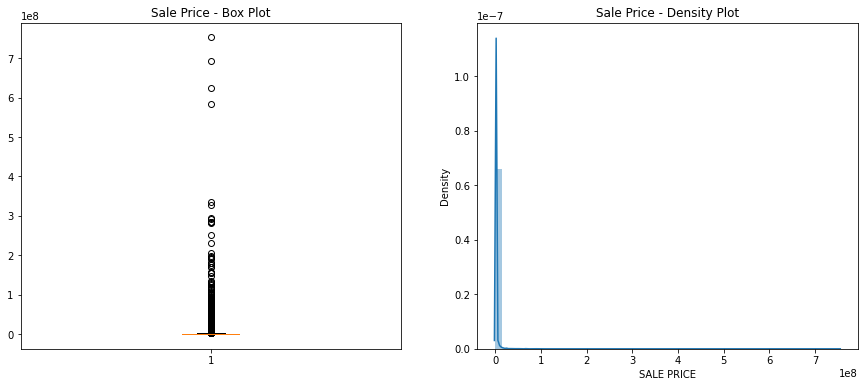

In [182]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.boxplot(NYC['SALE PRICE'])
plt.title('Sale Price - Box Plot')
plt.subplot(1,2,2)
sns.distplot(NYC['SALE PRICE'])
plt.title('Sale Price - Density Plot')
# Skewness
print("Skewness: %f" % NYC['SALE PRICE'].skew())
plt.show()

##### (i) Range set-up & Log-Transformation

In [183]:
# Sale price percentage = $0
len(NYC.loc[NYC['SALE PRICE'] == 0 ])/len(NYC)

0.4039848849192717

In [184]:
# Sale price percentage < $50000
len(NYC.loc[NYC['SALE PRICE'] < 50000])/len(NYC)

0.4304695205062001

In [185]:
# Sale price percentage < 12000000
len(NYC.loc[NYC['SALE PRICE'] > 12000000 ])/len(NYC)

0.007635110426524529

In [186]:
NYC['SALE PRICE'].describe()

count    9.024100e+04
mean     8.353422e+05
std      6.766940e+06
min      0.000000e+00
25%      0.000000e+00
50%      3.657500e+05
75%      6.545000e+05
max      7.531296e+08
Name: SALE PRICE, dtype: float64

##### Observation: 

It is observed that a lot of sales occur with an absurdly small number: \\$0  most commonly ( 40%  of the sale price =  \\$0 ). 
On the basis of the original data resource, it is noted that these sales are in effect transfers of deeds between parties. For instance, the transfer of ownership of the house from parents to the child after the parents move out for retirement. To handle this situation, a reasonable range for the sale price will be set up. The instances for which the sale price is greater than \\$12M and less than \\$50000 will be removed since it will help eliminate the special cases. Following which, log transformation can be performed. 

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

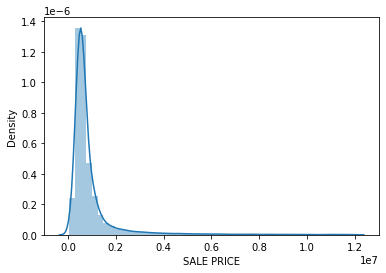

In [187]:
NYC = NYC[(NYC['SALE PRICE'] > 50000) & (NYC['SALE PRICE'] < 12000000)]
sns.distplot(NYC['SALE PRICE'])

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Sale Price - Box Plot')

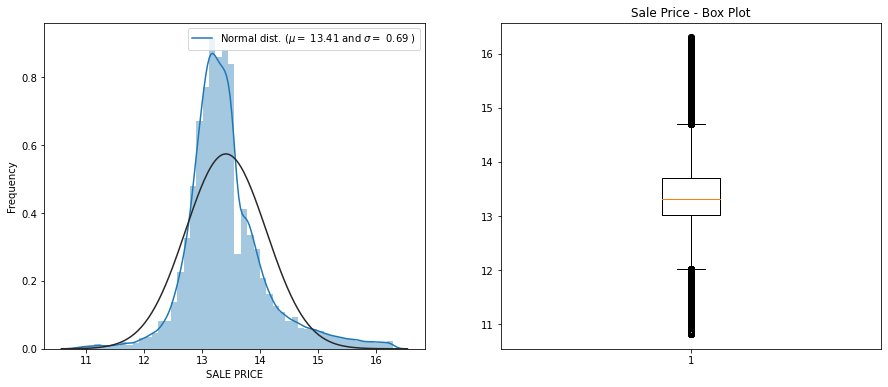

In [188]:
# log(x) transform

NYC["SALE PRICE"]=np.log(NYC["SALE PRICE"])

plt.subplots(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(NYC["SALE PRICE"], fit = stats.norm)
plt.ylabel('Frequency')
(mu, sigma) = stats.norm.fit(NYC["SALE PRICE"])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.subplot(1,2,2)
plt.boxplot(NYC['SALE PRICE'])
plt.title('Sale Price - Box Plot')

#### b. Feature Analysis and Selection 

In [189]:
NYC = NYC.drop(['salePrice_zscore', 'landSquare_zscore', 'grossSquare_zscore'],axis =1)
NYC.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
       'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIALUNITS',
       'COMMERCIALUNITS', 'TOTAL UNITS', 'LAND SQUARE FEET',
       'GROSS SQUARE FEET', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE',
       'BUILDING CLASSAT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

#### (i) Correlation 

<AxesSubplot:>

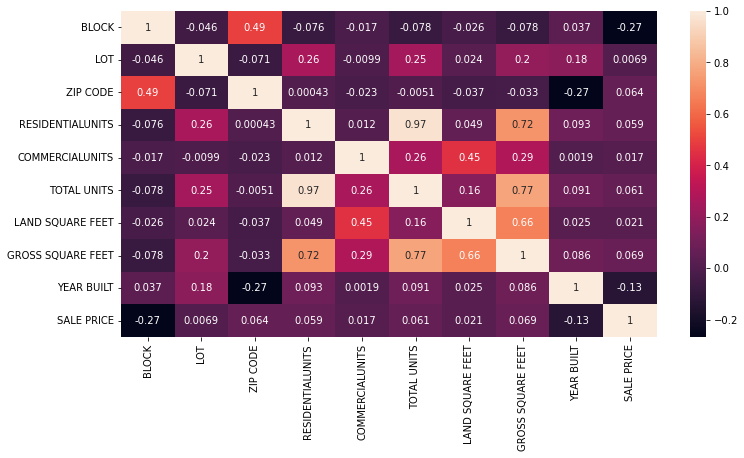

In [190]:
#Colinearity heatmap
corr = NYC.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True)

#### (ii) Feature Analysis and Selection

**- BOROUGH**

**Explanation**: The name of the borough in which the property is located.

1 = Bronx\
2 = Brooklyn\
3 = Manhattan\
4 = Queens\
5 = Staten Island

<AxesSubplot:title={'center':'Mean Sale Price in each BOROUGH'}, xlabel='BOROUGH'>

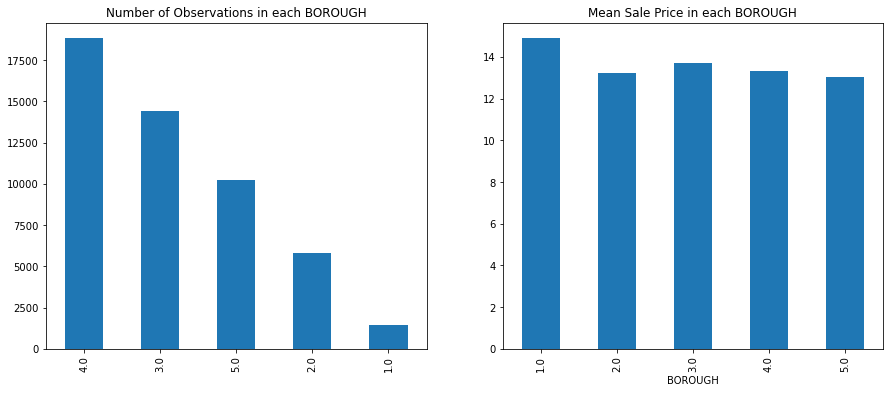

In [191]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Number of Observations in each BOROUGH")
NYC['BOROUGH'].value_counts().plot(kind='bar')

# Average price by borough
plt.subplot(1,2,2)
plt.title("Mean Sale Price in each BOROUGH")
NYC.groupby('BOROUGH').mean()['SALE PRICE'].plot(kind = 'bar')

C:\Users\Checkout\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


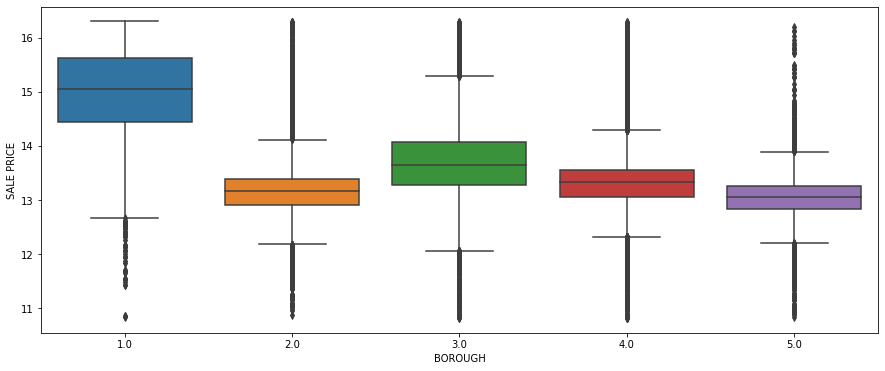

In [192]:
plt.figure(figsize=(15,6))
sns.boxplot(x=NYC['BOROUGH'].astype('category'), y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.show()

#### - NEIGHBORHOOD

**Explanation:** While evaluating properties, the name of the neighborhood is determined by the Department of Finance assessors. Although, the common name of the neighborhood is the same as designated by the Finance department, slight differences may occur when it comes to neighborhood boundary lines. It is also noted that a few sub-neighborhoods might not be included. 

Text(0, 0.5, 'Average sale price')

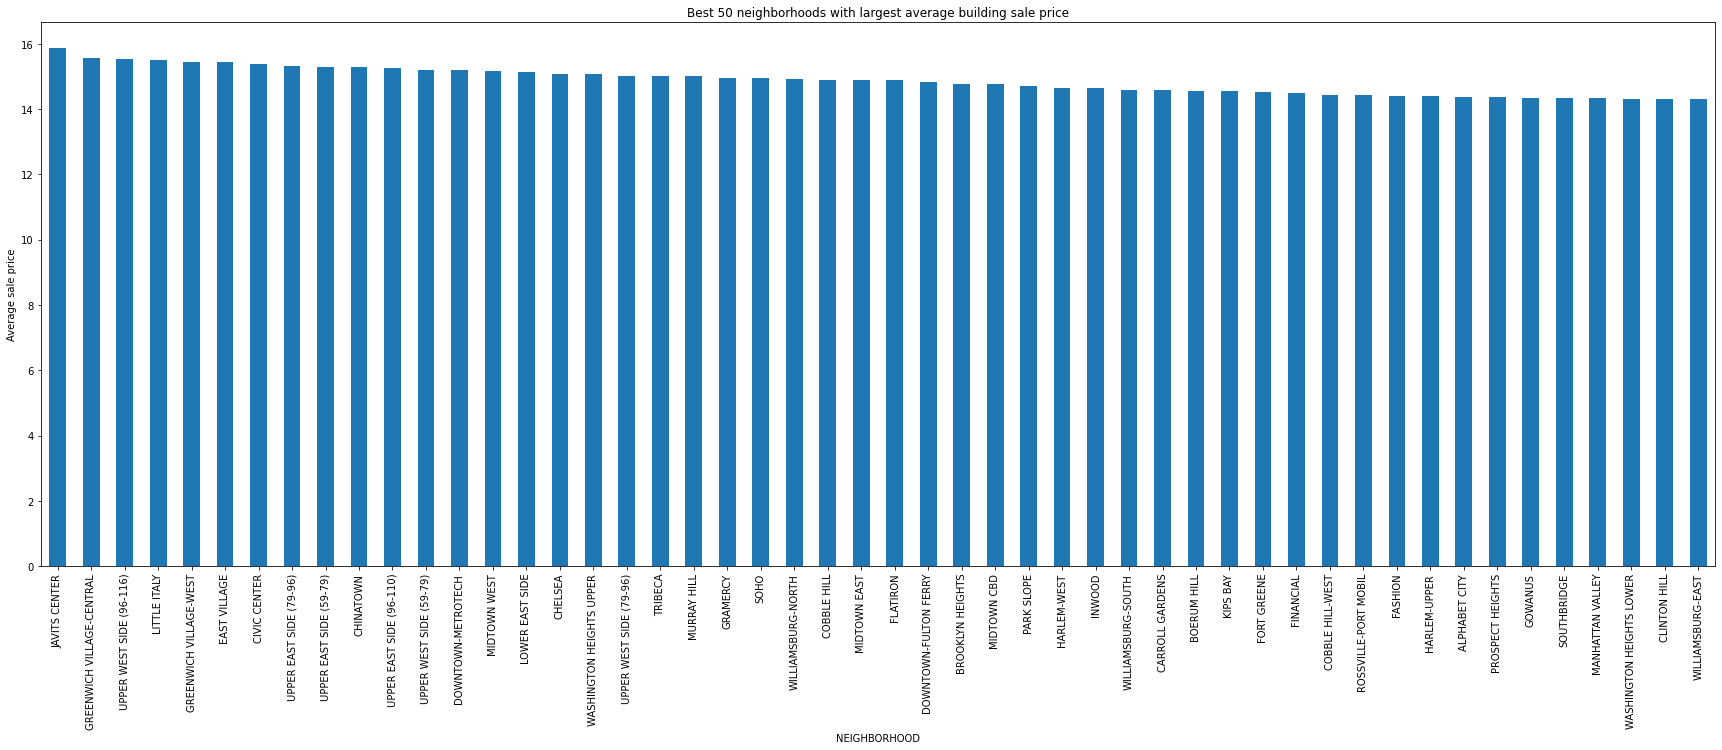

In [193]:
# Best 50 neighborhoods having largest average building sale price
plt.figure(figsize=(30,10))
NYC.groupby('NEIGHBORHOOD').mean()['SALE PRICE'].sort_values(ascending = False).head(50).plot(kind = 'bar')
plt.title("Best 50 neighborhoods with largest average building sale price")
plt.ylabel('Average sale price')

#### - Building Class category

**Explanation:** To help the users of the Rolling Sales Files to identify similar properties by broad usage such as One Family Homes without having to look up Individual Buildign Classes, this filed is included. The files are sorted by Borough, Neighborhood, Block, Building Class Category and Lot.  

In [194]:
NYC['BUILDING CLASS CATEGORY'].unique()

['03 THREE FAMILY DWELLINGS', '07 RENTALS - WALKUP APARTMENTS', '14 RENTALS - 4-10 UNIT', '01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', ..., '35 INDOOR PUBLIC AND CULTURAL FACILITIES', '39 TRANSPORTATION FACILITIES', '27 FACTORIES', '36 OUTDOOR RECREATIONAL FACILITIES', '34 THEATRES']
Length: 23
Categories (44, object): ['01 ONE FAMILY DWELLINGS', '02 TWO FAMILY DWELLINGS', '03 THREE FAMILY DWELLINGS', '04 TAX CLASS 1 CONDOS', ..., '46 CONDO STORE BUILDINGS', '47 CONDO NON-BUSINESS STORAGE', '48 CONDO TERRACES/GARDENS/CABANAS', '49 CONDO WAREHOUSES/FACTORY/INDUS']

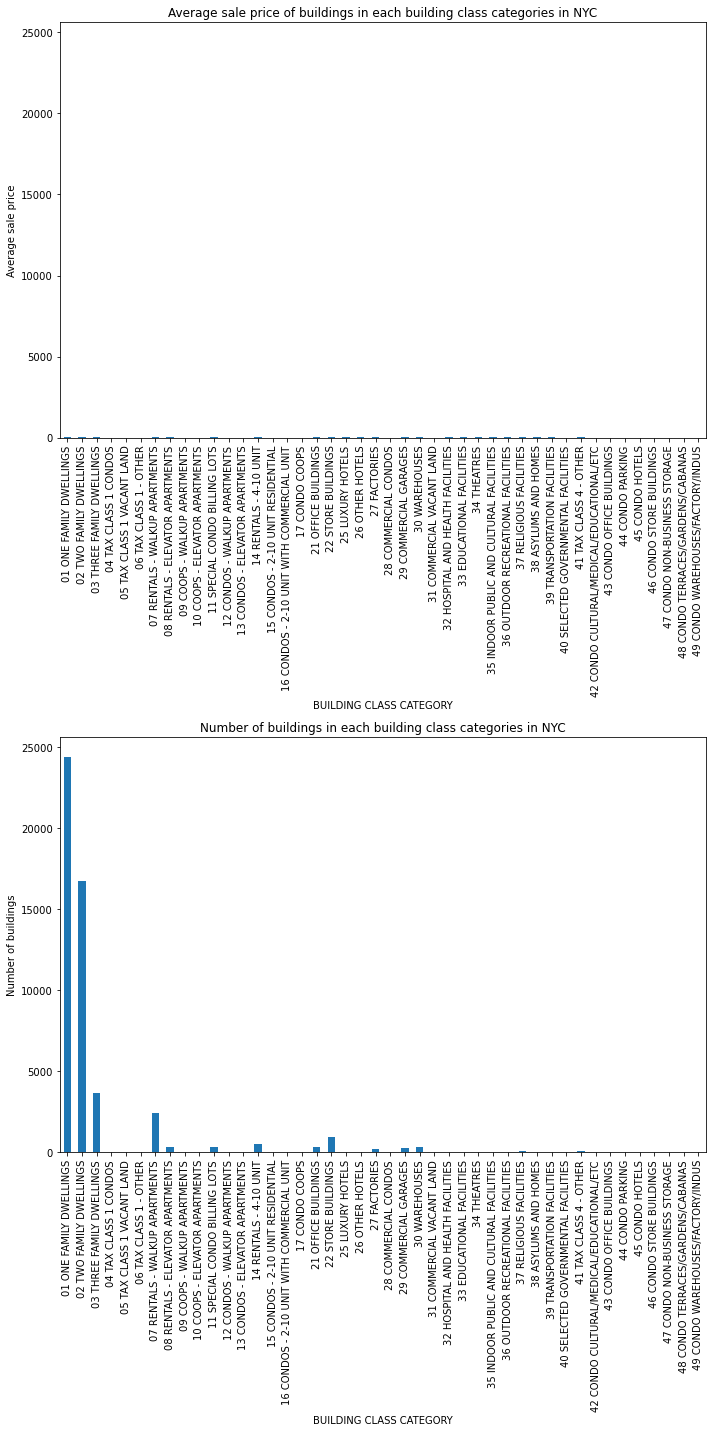

In [195]:
fig, axs = plt.subplots(2, 1, figsize=(10,20), sharey=True)
# Average price by building class category
plt.subplot(211)
NYC.groupby('BUILDING CLASS CATEGORY').mean()['SALE PRICE'].plot(kind = 'bar')
plt.title('Average sale price of buildings in each building class categories in NYC')
plt.ylabel('Average sale price')
 
# number of buildings by building class category
plt.subplot(212)
NYC.groupby('BUILDING CLASS CATEGORY').size().plot(kind = 'bar')
plt.title('Number of buildings in each building class categories in NYC')
plt.ylabel('Number of buildings')

plt.tight_layout()
plt.show()

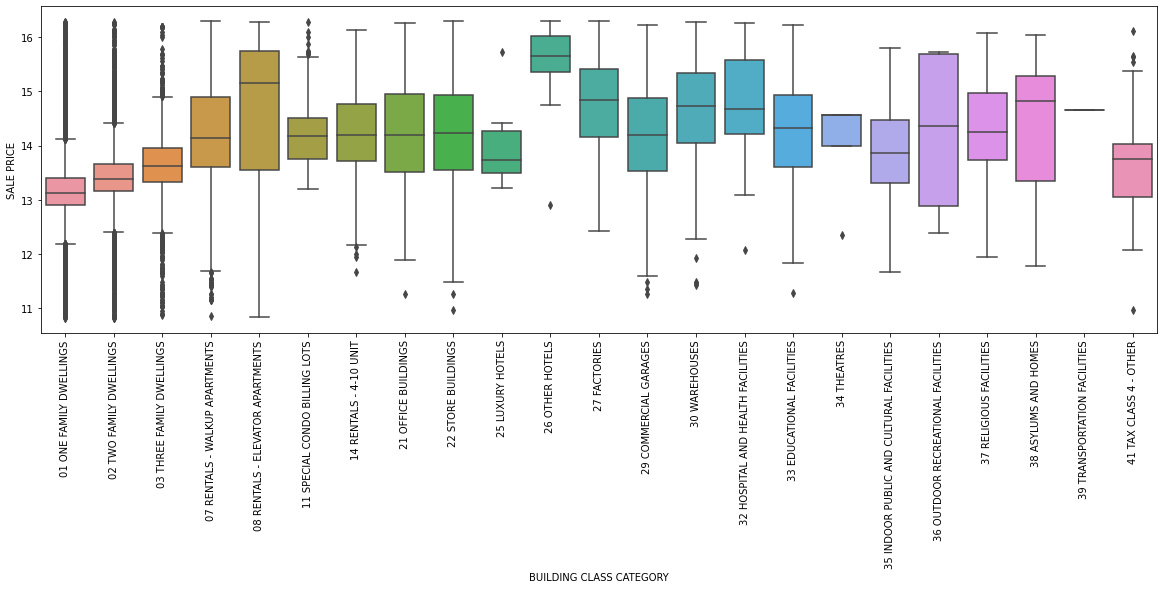

In [196]:
plt.figure(figsize=(20,6))
order = sorted(NYC['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x=NYC['BUILDING CLASS CATEGORY'], y = NYC['SALE PRICE'], data=NYC, order=order)
plt.xticks(rotation = 90)
plt.show()

C:\Users\Checkout\anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

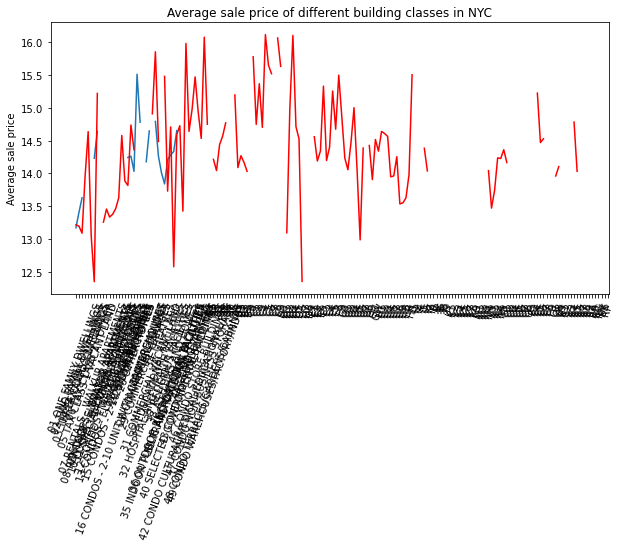

In [197]:
plt.figure(figsize=(10,5))
plt.plot(NYC.groupby('BUILDING CLASS CATEGORY').mean()['SALE PRICE'])
plt.title('Average sale price of different building classes in NYC')
plt.ylabel('Average sale price')
plt.xticks(rotation = 70)

plt.plot(NYC.groupby('BUILDING CLASSAT TIME OF SALE').mean()['SALE PRICE'],color='r')
plt.title('Average sale price of different building classes in NYC')
plt.ylabel('Average sale price')
plt.xticks(rotation = 70)

#### - Tax calss at Present vs Tax class at Time of Sale

**Explanation**

It is observed that each property in the city is allocated to one of four tax classes (Classes 1, 2, 3, and 4), on the basis of the usage of property.

• Class 1: Contains residential properties of upto three units(for instance, one-,two-, and three- small stores or family homes or offices with one or two attached apartments), condominiums which are not more than three stories and vacant land that is zoned for residential use. 

• Class 2: Contains all other property that is fundamentally residential, such as condominiums and cooperatives.

• Class 3: Contains property with equipment owned by a telephone, gas or electric company.

• Class 4: Contains all other properties not included in class 1,2, and 3, such as factories, garage buildings, offices warehouses etc.

**Note:** We will select Tax class at time of sale since it reveals the latest information about the property that is sold.

In [198]:
NYC['TAX CLASS AT TIME OF SALE'].value_counts()

1.0    44758
2.0     3583
4.0     2365
Name: TAX CLASS AT TIME OF SALE, dtype: int64

C:\Users\Checkout\anaconda3\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


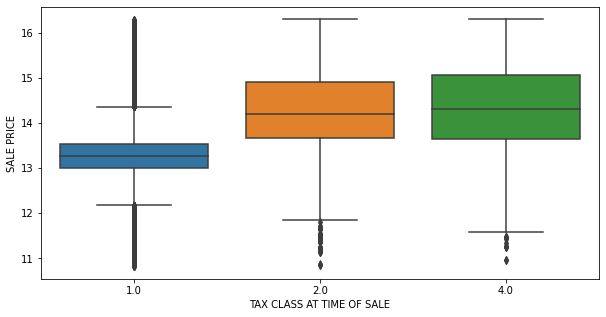

In [199]:
plt.figure(figsize=(10,5))
sns.boxplot(x=NYC['TAX CLASS AT TIME OF SALE'], y = NYC['SALE PRICE'], data=pd.melt(NYC))
plt.show()

#### - Block and Lot
**Explanation**

The Department of Finance implements a Borough-Block-Lot classification to label the actual property in the city. Hence, a Tax Block is a sub-division of the borough on which the real properties are located. While addresses describe the location of the street of a property, the lot and block distinguishes one unit of real property from another such as the various condominiums in a single building. Additionally, the blocks and lots are not subject to name changes depending on which side of the parcel the building puts its entrance on. 
A Tax Lot is a subdivision of Tax Block and it represents the unique location of the property. 
Since the block and lot are unique for each property, we will drop them as they are irrelevant features for this project. 

#### - Building Classat Present vs Building Class At Time of Sale

**Explanation**: The Building Classification is used to describe the constructive use of the property. 

**Note:** We will select building class at time of sale since it reveals the latest information about the property that is sold.

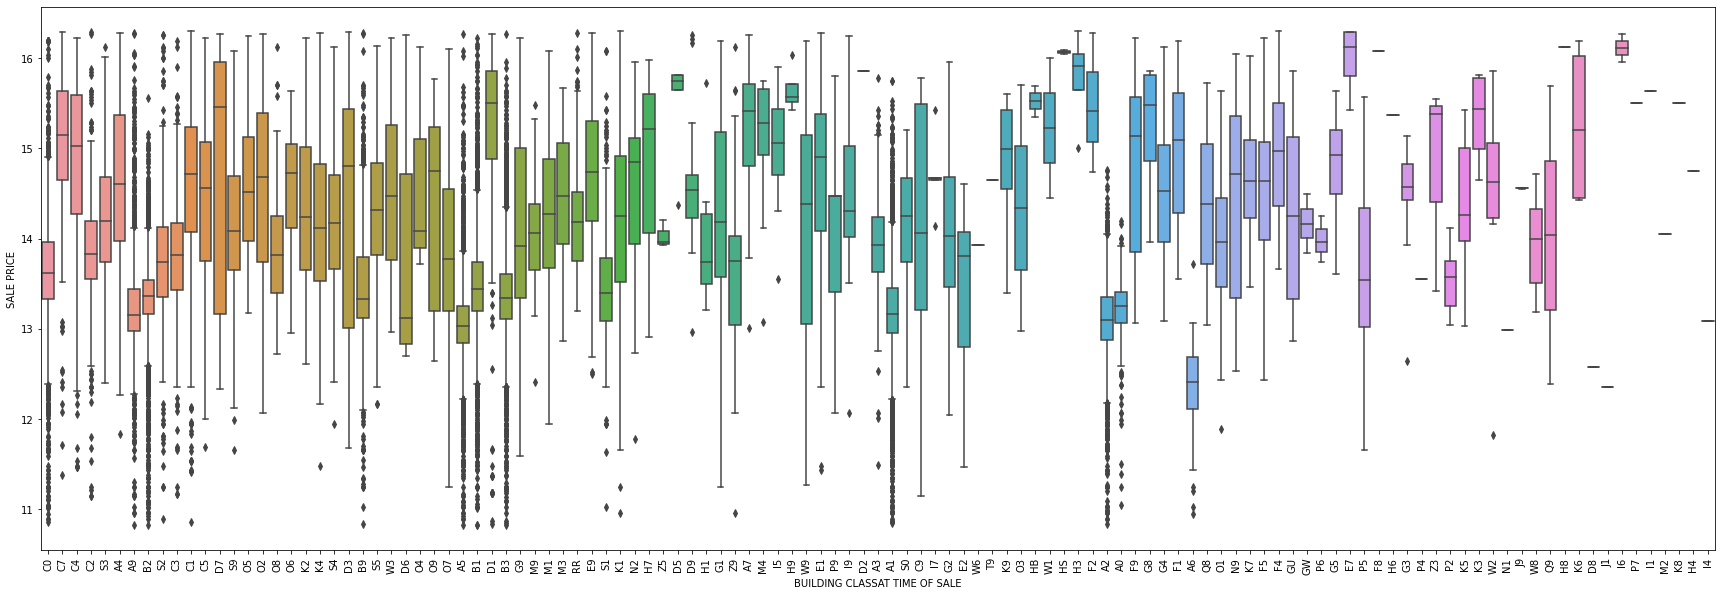

In [201]:
plt.figure(figsize=(30,10))
order = NYC['BUILDING CLASSAT TIME OF SALE'].unique()
sns.boxplot(x='BUILDING CLASSAT TIME OF SALE', y='SALE PRICE', data=NYC, order = order)
plt.xticks(rotation=90)
plt.show()

#### - Address, Apartment Number and Zip Code

**Note:** Since the Address, Apartment Number and Zip Code are unique for each property, they are irrevalent features for this project and hence, we will drop them.

#### Year Built

Text(0.5, 0, 'Year Built')

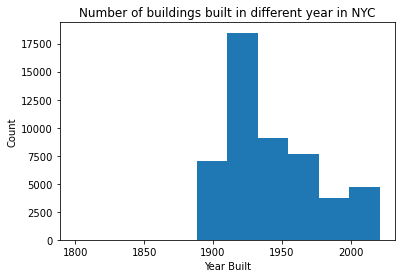

In [202]:
plt.hist(NYC['YEAR BUILT'])
plt.title('Number of buildings built in different year in NYC')
plt.ylabel('Count')
plt.xlabel("Year Built")

Text(0, 0.5, 'Average or Median sale price')

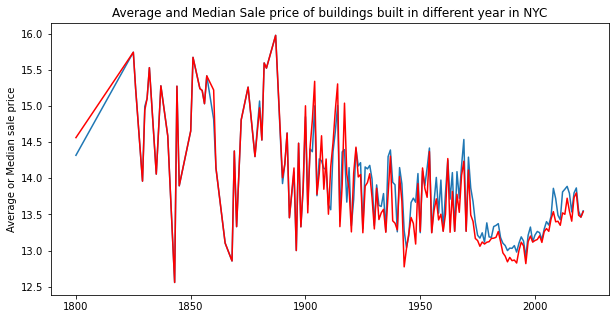

In [203]:
plt.figure(figsize=(10,5))
plt.plot(NYC.groupby('YEAR BUILT').mean()['SALE PRICE'])
plt.plot(NYC.groupby('YEAR BUILT').median()['SALE PRICE'],color='r')
plt.title('Average and Median Sale price of buildings built in different year in NYC')
plt.ylabel('Average or Median sale price')

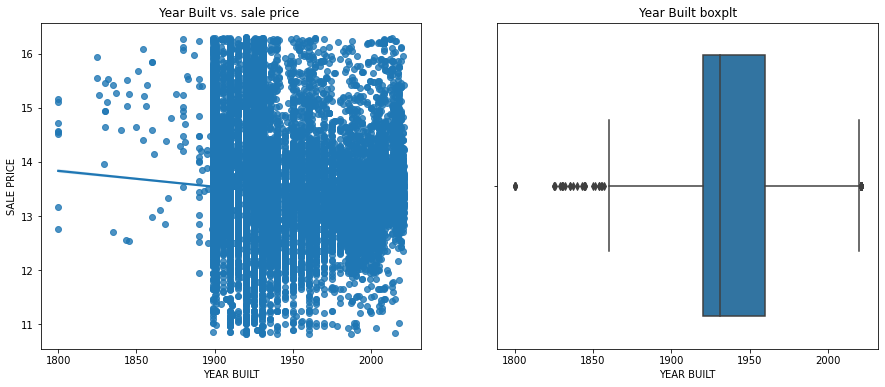

In [204]:
# Year Built
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)

sns.regplot(x='YEAR BUILT', y='SALE PRICE',data=NYC)
plt.title('Year Built vs. sale price ')
plt.subplot(1,2,2)
sns.boxplot(x= 'YEAR BUILT', data=NYC)
plt.title('Year Built boxplt')
plt.show()

#### - Residential Units, Commercial Units and Total Units

**Explanation**

-  Residential Units is the number of residential units a property has.
-  Comercial Units is the number of commercial units a property has.
-  Total Units is the sum of residential and commercial units that the property has.

In [205]:
NYC['RESIDENTIALUNITS'].max()

8764.0

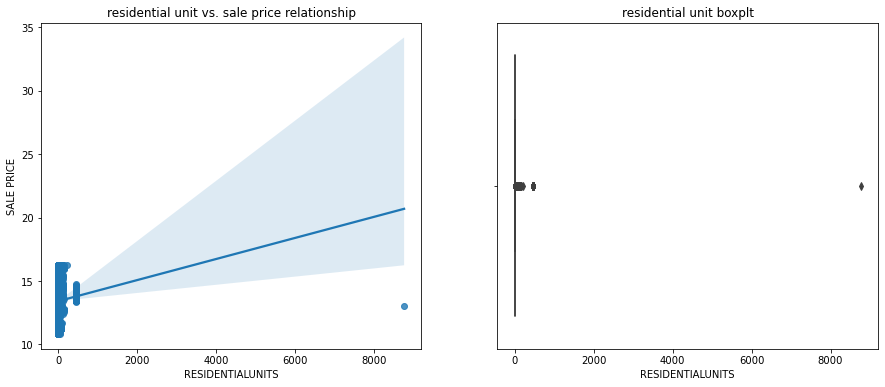

In [206]:
# residential_units
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.regplot(x='RESIDENTIALUNITS', y='SALE PRICE',data=NYC)
plt.title('residential unit vs. sale price relationship')
plt.subplot(1,2,2)
sns.boxplot(x='RESIDENTIALUNITS', data=NYC)
plt.title('residential unit boxplt')
plt.show()

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

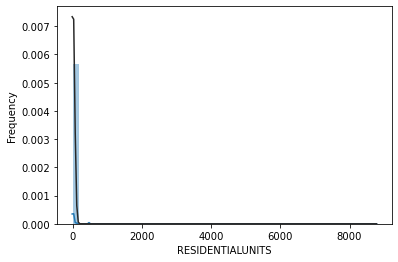

In [207]:
#density plot
sns.distplot(NYC['RESIDENTIALUNITS'],fit = stats.norm)
plt.ylabel('Frequency')

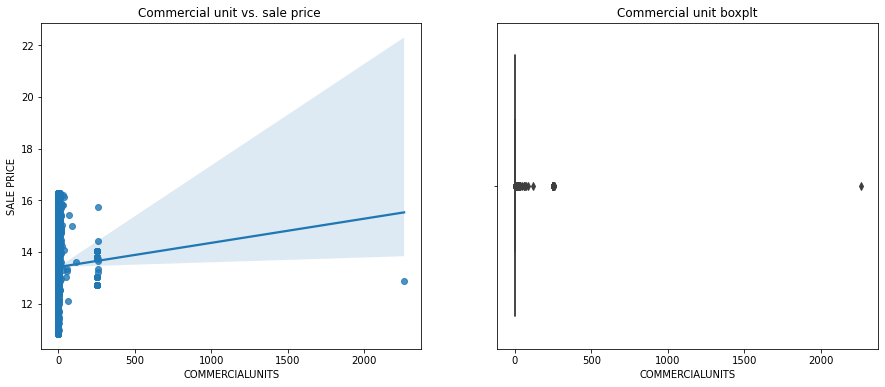

In [208]:
# commercial units
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.regplot(x='COMMERCIALUNITS', y='SALE PRICE',data=NYC)
plt.title('Commercial unit vs. sale price ')
plt.subplot(1,2,2)
sns.boxplot(x='COMMERCIALUNITS', data=NYC)
plt.title('Commercial unit boxplt')
plt.show()

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

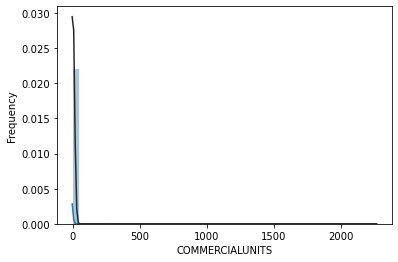

In [209]:
#density plot
sns.distplot(NYC['COMMERCIALUNITS'],fit = stats.norm)
plt.ylabel('Frequency')

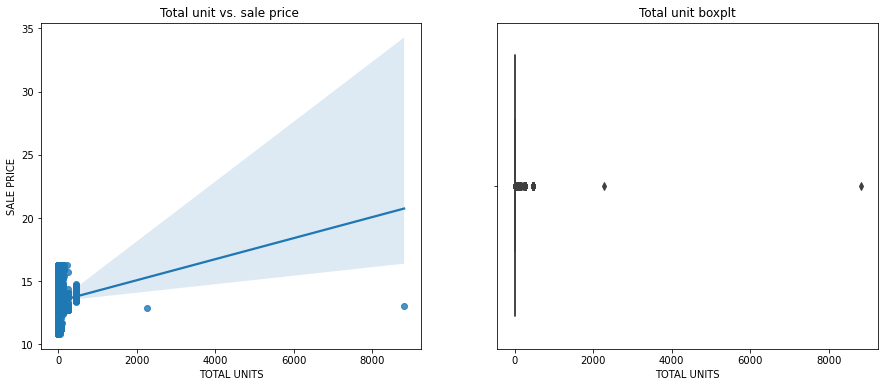

In [210]:
# total units
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.regplot(x='TOTAL UNITS', y='SALE PRICE',data=NYC)
plt.title('Total unit vs. sale price ')
plt.subplot(1,2,2)
sns.boxplot(x='TOTAL UNITS', data=NYC)
plt.title('Total unit boxplt')
plt.show()

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

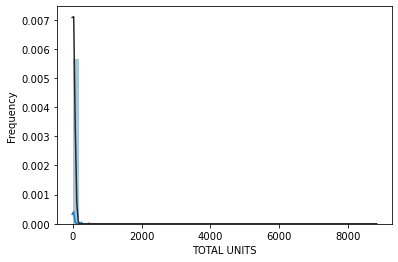

In [211]:
#density plot
sns.distplot(NYC['TOTAL UNITS'],fit = stats.norm)
plt.ylabel('Frequency')

#### - Land Square Feet and Gross Square Feet

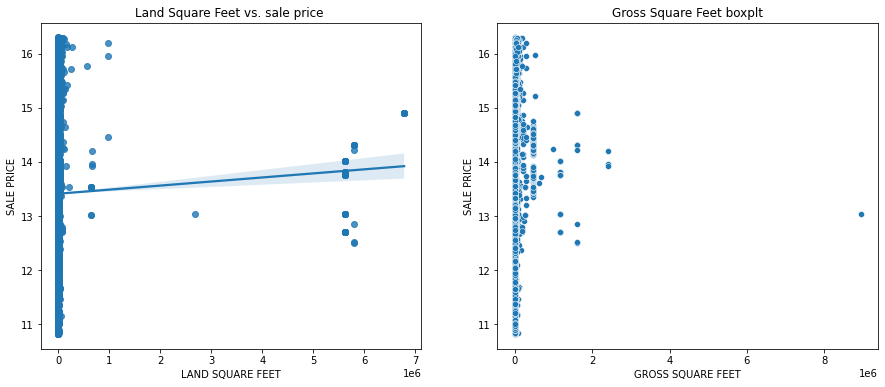

In [212]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE',data=NYC)
plt.title('Land Square Feet vs. sale price ')
plt.subplot(1,2,2)
sns.scatterplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=NYC)
plt.title('Gross Square Feet boxplt')
plt.show()

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gross Square Feet density plot')

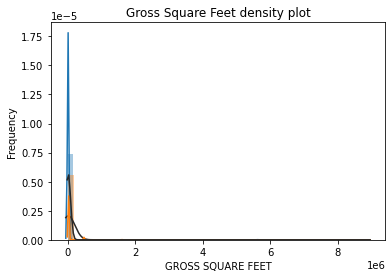

In [213]:
#density plot
sns.distplot(NYC['LAND SQUARE FEET'],fit = stats.norm)
plt.ylabel('Frequency')
plt.title('Land Square Feet density plot')
sns.distplot(NYC['GROSS SQUARE FEET'],fit = stats.norm)
plt.ylabel('Frequency')
plt.title('Gross Square Feet density plot')

<Figure size 1080x432 with 0 Axes>

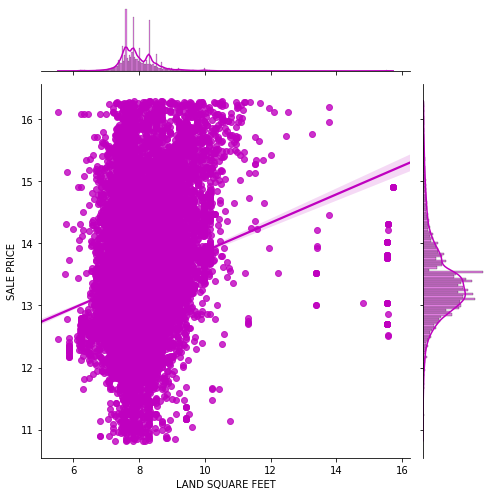

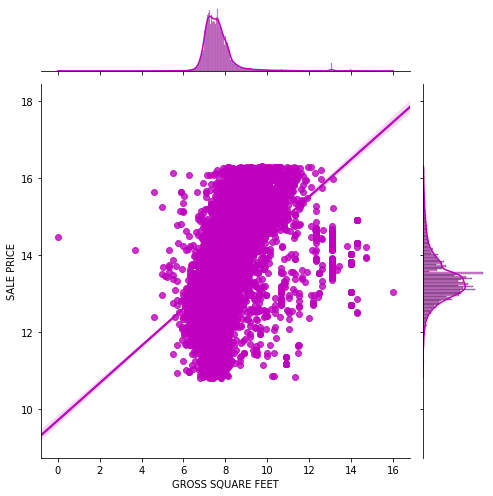

In [214]:
NYC['LAND SQUARE FEET']=np.log(NYC['LAND SQUARE FEET'])
NYC['GROSS SQUARE FEET']=np.log(NYC['GROSS SQUARE FEET'])
plt.figure(figsize=(15,6));
a=sns.jointplot(x="LAND SQUARE FEET", y="SALE PRICE", data=NYC,
                  kind="reg", truncate=False,
                  color="m", height=7);
b=sns.jointplot(x="GROSS SQUARE FEET", y="SALE PRICE", data=NYC,
                  kind="reg", truncate=False,
                  color="m", height=7);


#### Summary: 
Based on the data analysis and visualisation that we have done, we will drop the following features:

NEIGHBORHOOD, ADDRESS, APARTMENT NUMBER, BLOCK, LOT, ZIP CODE, BLOCK, TAX CLASS AS OF , BUILDING AS OF FINAL 

In [215]:
NYC = NYC.drop(columns=["ADDRESS", "APARTMENT NUMBER", "LOT", "ZIP CODE", "BLOCK", 
                        "NEIGHBORHOOD", "TAX CLASS AT TIME OF SALE",
                        "BUILDING CLASSAT TIME OF SALE"])

### 4. Feature Engineering: 
**a. Classification**

As observed from the scatter plots of **Commercial Units vs Sale Price** and **Residential Units vs. Sale Price**, we see that the pattern is opaque with a lot of 0's and 1's in each plot. Therefore, we will classify it under the following criteria.

In [216]:
# Type A: Commercial Units > 10
NYC.loc[NYC['COMMERCIALUNITS']>10,'UNIT CATEGORY'] = 'A' ## commericial >10 
# Type B: Commercial Units <= 10
NYC.loc[(NYC['COMMERCIALUNITS']>0)&(NYC['COMMERCIALUNITS']<=10),'UNIT CATEGORY'] = 'B'
# Type C: Commercial Units = 0 and Residential Units = 1
NYC.loc[(NYC['COMMERCIALUNITS']==0)&(NYC['RESIDENTIALUNITS']==1),'UNIT CATEGORY'] = 'C' 
# Type D: Commercial Units = 0 and Residential Units <10
NYC.loc[(NYC['COMMERCIALUNITS']==0)&(NYC['RESIDENTIALUNITS']>1)&(NYC['RESIDENTIALUNITS']<10),'UNIT CATEGORY'] = 'D' 
# Type D: Commercial Units = 0 and Residential Units >= 10
NYC.loc[(NYC['COMMERCIALUNITS']==0)&(NYC['RESIDENTIALUNITS']>=10),'UNIT CATEGORY'] = 'E'
# Type E: Commercial Units = 0 and Residential Units = 0
NYC.loc[(NYC['COMMERCIALUNITS']==0)&(NYC['RESIDENTIALUNITS']==0),'UNIT CATEGORY'] = 'F'
NYC['UNIT CATEGORY'] = NYC['UNIT CATEGORY'].astype('category')

Text(0.5, 1.0, 'Unit category vs. Sale Price')

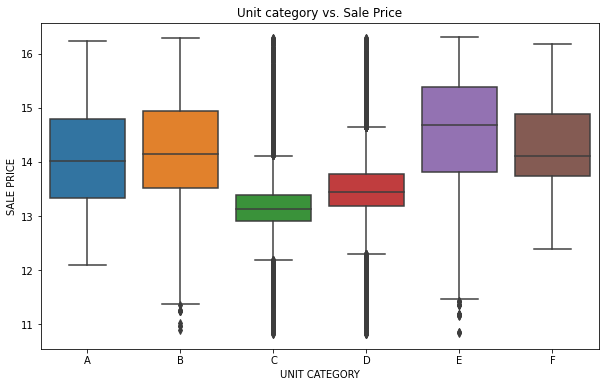

In [217]:
# Visualization
plt.figure(figsize=(10,6))
sns.boxplot(x='UNIT CATEGORY', y='SALE PRICE',data=NYC)
plt.title('Unit category vs. Sale Price')

In [219]:
NYC.columns

Index(['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT',
       'BUILDING CLASS AT PRESENT', 'RESIDENTIALUNITS', 'COMMERCIALUNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE', 'UNIT CATEGORY'],
      dtype='object')

###### Now, UNIT CATEGORY will be used for further analysis.

In [220]:
NYC=NYC.drop(['COMMERCIALUNITS', 'RESIDENTIALUNITS', 
              'TOTAL UNITS','BUILDING CLASS AT PRESENT'],axis=1)

In [221]:
NYC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50706 entries, 3 to 167780
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   BOROUGH                  50706 non-null  category
 1   BUILDING CLASS CATEGORY  50706 non-null  category
 2   TAX CLASS AT PRESENT     50706 non-null  category
 3   LAND SQUARE FEET         50706 non-null  float64 
 4   GROSS SQUARE FEET        50706 non-null  float64 
 5   YEAR BUILT               50706 non-null  float64 
 6   SALE PRICE               50706 non-null  float64 
 7   UNIT CATEGORY            50706 non-null  category
dtypes: category(4), float64(4)
memory usage: 4.1 MB


#### b. Categorical features: One Hot Encoding 

In [222]:
categoricals= NYC.select_dtypes('category').columns.tolist()
one_hot_encoded = pd.get_dummies(NYC[categoricals])
NYC = NYC.drop(categoricals,axis = 1)
NYC_new = NYC.join(one_hot_encoded)
NYC_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50706 entries, 3 to 167780
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   LAND SQUARE FEET                                                    50706 non-null  float64
 1   GROSS SQUARE FEET                                                   50706 non-null  float64
 2   YEAR BUILT                                                          50706 non-null  float64
 3   SALE PRICE                                                          50706 non-null  float64
 4   BOROUGH_1.0                                                         50706 non-null  uint8  
 5   BOROUGH_2.0                                                         50706 non-null  uint8  
 6   BOROUGH_3.0                                                         50706 non-null  uint8  
 7   BOROUGH_4.0 

#### c. Numerical features transformation

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


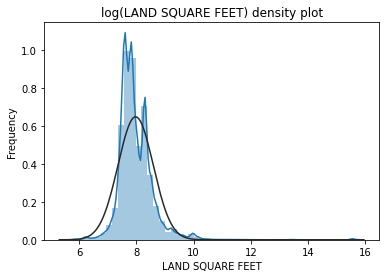

In [223]:
#density plot
sns.distplot(NYC_new['LAND SQUARE FEET'],fit = stats.norm)
plt.ylabel('Frequency')
plt.title("log(LAND SQUARE FEET) density plot")
plt.show()

C:\Users\Checkout\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


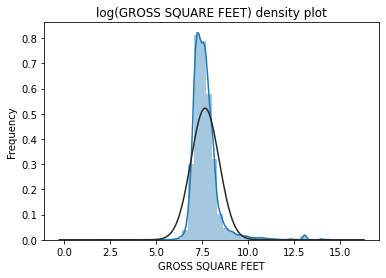

In [224]:
#density plot
sns.distplot(NYC_new['GROSS SQUARE FEET'],fit = stats.norm)
plt.ylabel('Frequency')
plt.title("log(GROSS SQUARE FEET) density plot")
plt.show()

### 5. Modelling:

#### Train Test Split 

In [225]:
from sklearn.model_selection import train_test_split

X = NYC_new.drop('SALE PRICE', axis = 1)
y = NYC_new['SALE PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

#### a. Linear Regression

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

MSE: 0.267155001074181
RMSE: 0.5168703909822858
R-square 0.45625027789925066


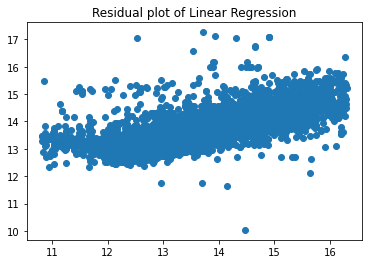

In [227]:
pred_linear = lin_reg.predict(X_test)
plt.scatter(y_test, pred_linear)
plt.title('Residual plot of Linear Regression')
print('MSE:', metrics.mean_squared_error(y_test, pred_linear))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_linear)))
print('R-square', metrics.r2_score(y_test, pred_linear))

In [228]:
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

Test set evaluation:
_____________________________________
MAE: 0.36483044109383833
MSE: 0.36448869248159416
RMSE: 0.6037289892671994
R2 Square 0.2581436826978931
Train set evaluation:
_____________________________________
MAE: 0.3567751519169628
MSE: 0.3407470155677738
RMSE: 0.5837353985906404
R2 Square 0.28903414048242326


Text(0.5, 1.0, 'Residual plot of Robust Regression')

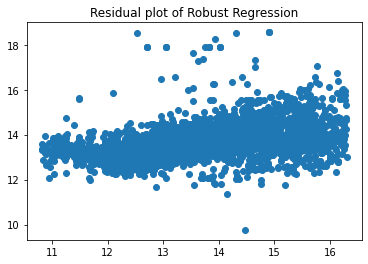

In [229]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(max_trials=1000)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

plt.scatter(y_test, test_pred)
plt.title('Residual plot of Robust Regression')

#### b. Lasso Regression

MAE: 0.4106475606814465
MSE: 0.3577337239138058
RMSE: 0.5981084549760234
R-square 0.27189230154001


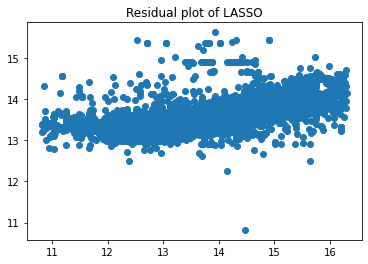

In [230]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg_predict = lasso_reg.predict(X_test)

plt.scatter(y_test, lasso_reg_predict)
plt.title('Residual plot of LASSO')
print('MAE:', metrics.mean_absolute_error(y_test, lasso_reg_predict))
print('MSE:', metrics.mean_squared_error(y_test, lasso_reg_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_reg_predict)))
print('R-square', metrics.r2_score(y_test, lasso_reg_predict))

#### c. Ridge Regression

MAE: 0.33723814562239496
MSE: 0.2671401732573365
RMSE: 0.5168560469389292
R-square 0.4562804574626358


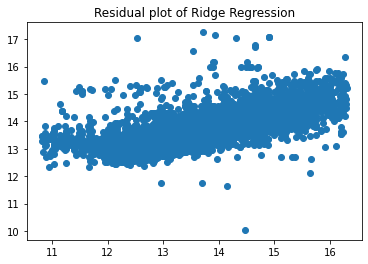

In [231]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_train, y_train)
ridge_reg_predict = ridge_reg.predict(X_test)

plt.scatter(y_test, ridge_reg_predict)
plt.title('Residual plot of Ridge Regression')
print('MAE:', metrics.mean_absolute_error(y_test, ridge_reg_predict))
print('MSE:', metrics.mean_squared_error(y_test, ridge_reg_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_reg_predict)))
print('R-square', metrics.r2_score(y_test, ridge_reg_predict))

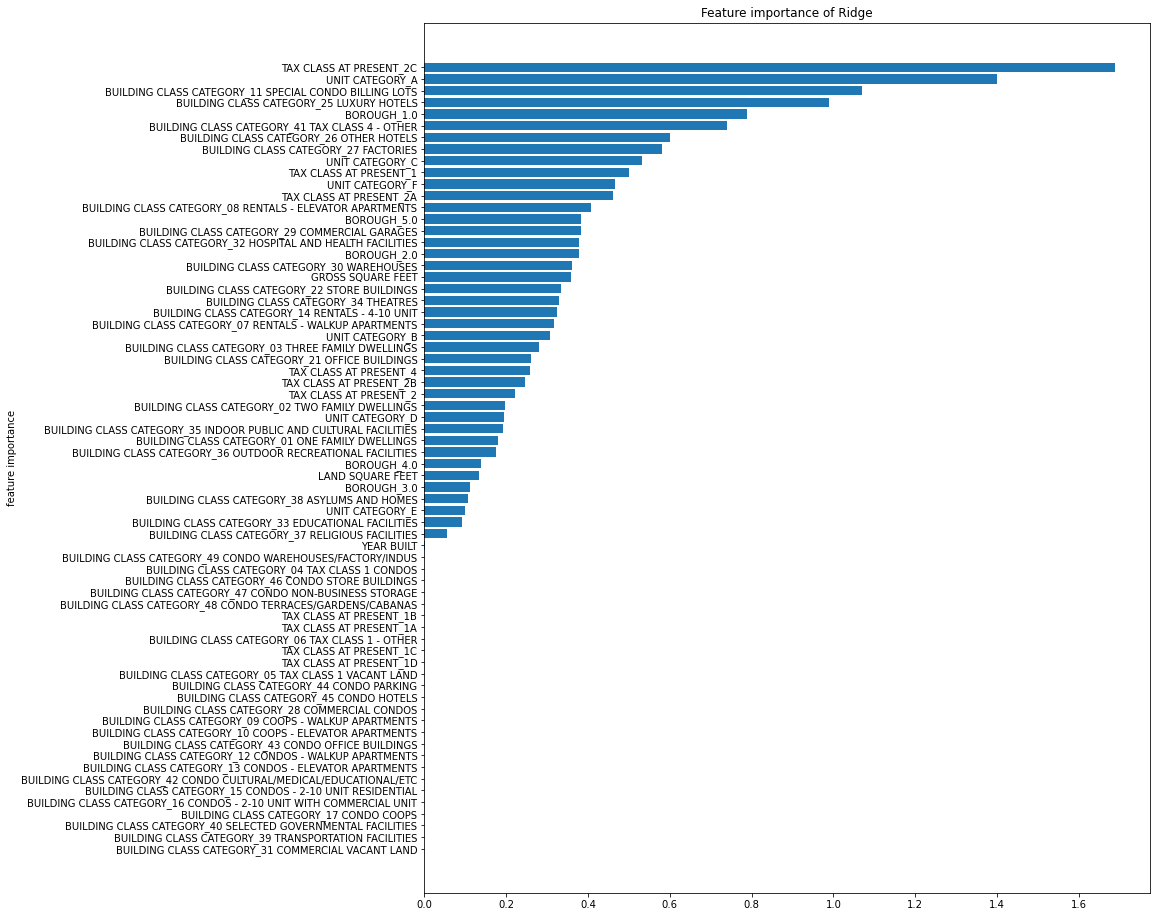

In [232]:
ridge_result = pd.DataFrame({'feature': X_train.columns, 'importance': abs(ridge_reg.coef_)})
ridge_result_sorted = ridge_result.sort_values(by = 'importance', ascending = True)

fig, ax1 = plt.subplots(figsize = (13,16))
ax1.barh(ridge_result_sorted['feature'], ridge_result_sorted['importance'])
ax1.set_ylabel('feature importance')
ax1.set_title('Feature importance of Ridge')
plt.show()